In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [19]:
input_nodes = 40
units = 64
output_nodes = 1

In [20]:
def initialize_params(input_nodes, units, output_nodes):

    def normal(shape):
        return np.random.normal(0, 1, size = shape)

    def matrix():
        return (normal((input_nodes, units)), normal((units, units)), torch.zeros(units))

    w_xz, w_hz, b_z = matrix()
    w_xr, w_hr, b_r = matrix()
    w_xh, w_hh, b_h = matrix()

    #output parameters
    w_hq = normal((units, output_nodes))
    b_q = torch.zeros(output_nodes, )
    
    return [w_xz, w_hz, b_z, w_xr, w_hr, b_r, w_xh, w_hh, b_h, w_hq, b_q]

In [21]:
def gru(inputs, params):
    w_xz, w_hz, b_z, w_xr, w_hr, b_r, w_xh, w_hh, b_h, w_hq, b_q = params 
    H = np.random.normal(0, 1, size =(input_nodes, units))

    outputs = []
    for X in inputs: 
        Z = torch.sigmoid((np.matmul(X, w_xz))+(np.matmul(H, w_hz))+b_z)
        R = torch.sigmoid((np.matmul(X, w_xr))+(np.matmul(H, w_hr))+b_r)
        H_tilda = torch.tanh(np.matmul(X, w_xh)+(np.matmul((R * H), w_hh))+b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = np.matmul(H, w_hq) + b_q

    return H

In [22]:
def conver_to_dataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X), np.array(Y)

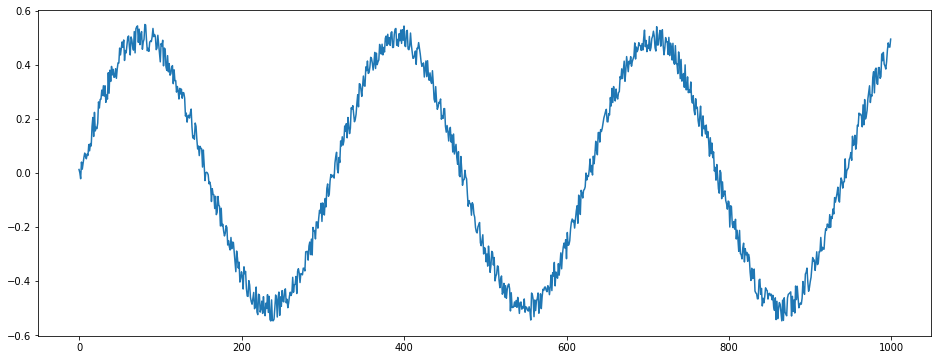

In [23]:
N = 1000 
t = np.arange(0, N)
data_sine = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 6))
plt.plot(data_sine)

In [24]:
X_sine, Y_sine = conver_to_dataset(data_sine, 40)
X_sine = torch.Tensor(X_sine)

In [25]:
params = initialize_params(input_nodes, units, output_nodes)
gru_output = gru(X_sine, params)

In [28]:
w_hq = params[9]
b_q = params[10]

np.matmul(gru_output, w_hq) + b_q

tensor([[  1.2606],
        [  1.0858],
        [ -4.6389],
        [  4.2981],
        [ -5.4723],
        [  1.1442],
        [ -6.1823],
        [ -2.6249],
        [ -7.2848],
        [  3.0414],
        [  0.0731],
        [ -3.6757],
        [ 10.1422],
        [ -5.5735],
        [  3.4097],
        [  4.2501],
        [ -4.0997],
        [ -1.0088],
        [-10.8464],
        [  1.3950],
        [  7.5773],
        [ -2.2605],
        [ -1.4744],
        [  2.8805],
        [  6.5433],
        [-12.4661],
        [ -1.9527],
        [ -0.2780],
        [-14.5683],
        [ -5.1813],
        [ -9.7697],
        [-17.3202],
        [  3.5838],
        [ -3.5818],
        [ -0.0900],
        [ -3.7817],
        [ -7.7618],
        [  2.1129],
        [  0.2143],
        [-14.6296]], dtype=torch.float64)